# A Simple Perceptron for binary classification

Let's make a single perceptron from scratches for a binary classification problem, in particular on the standard iris dataset.

In [26]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()


In [29]:
X= iris.data[:,:]
Y =(iris.target == 0).astype(np.int) # we have " 1" for the values in the target = 0 ("setosa" species) , "0" otherwise ("versicolor" or "viriginica" species).
noise = np.random.normal(0,1,(150, 4)) # some noise to add to the features, to avoid overfitting 

Let's see the kind of flower:

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Let's add noise to the data:

In [30]:
X = pd.DataFrame(X+noise)
X.shape

(150, 4)

Let's add a bias column:

In [31]:
X.insert(0, 'bias',[1 for i in range(X.shape[0])])

Let's prepare test ad train set:

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3,random_state = 42)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)


Let's initialize the parameters of the perceptron:

In [33]:
theta = np.zeros(5) #weight matrix 
eta  = 0.1 # learning rate
n_epochs = 10 # number of epochs
Y_pred_vector_train = np.array([0 for i in range(len(Y_train))]) # predictions vector

Let's define two activation function :

In [35]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def heaviside(x):
    if x > 0 :
        return 1
    else :
        return 0

Let's train the perceptron:

In [36]:
for i in range(n_epochs):
    for j in range(len(Y_train)):
        z = np.dot(X_train.iloc[j],theta)
        Y_pred = heaviside(z)
        Y_pred_vector_train[j] = Y_pred # this part is optional, i wrote this row to have a vector for predictions and to calculate some metrics for the perceptron.
        theta = theta + eta*X_train.iloc[j]*(Y_train[j]-Y_pred) # Hebb's rule of learning

Let's use the weight matrix to make prediction on test set:

In [38]:
Y_pred_vector_test = []
for i in range(X_test.shape[0]):
    Y_pred_i = heaviside(np.dot(X_test.iloc[i],theta))
    Y_pred_vector_test.append(Y_pred_i)
Y_pred_vector_test = np.array(Y_pred_vector_test)


Let's evaluate this perceptron:

In [48]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy_train = accuracy_score(Y_train,Y_pred_vector_train)
precision_train = precision_score(Y_train,Y_pred_vector_train)
recall_train= recall_score(Y_train,Y_pred_vector_train)
f1_train = f1_score(Y_train,Y_pred_vector_train)

accuracy_test = accuracy_score(Y_test,Y_pred_vector_test)
precision_test = precision_score(Y_test,Y_pred_vector_test)
recall_test= recall_score(Y_test,Y_pred_vector_test)
f1_test = f1_score(Y_test,Y_pred_vector_test)
print("The metrics for this perceptron are equal to : (accuracy train set = %.2f; accuracy test set = %.2f), (recall train set = %.2f; recall test set = %.2f), (precision train set = %.2f; precision test set = %.2f), (f1 train set = %.2f; f1 test set = %.2f,)" %(accuracy_train,accuracy_test,recall_train,recall_test,precision_train,precision_test,f1_train,f1_test))

The metrics for this perceptron are equal to : (accuracy train set = 0.90; accuracy test set = 0.82), (recall train set = 0.81; recall test set = 1.00), (precision train set = 0.86; precision test set = 0.70), (f1 train set = 0.83; f1 test set = 0.83,)


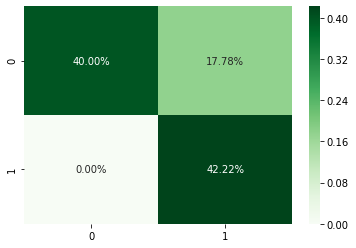

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
cm = confusion_matrix(Y_test,Y_pred_vector_test)
label = ['True Negative','False Positive','False Negative', 'True Positive']
sb.heatmap(cm/np.sum(cm),cmap = 'Greens', fmt='.2%' ,annot= True)

## Conlusion 

 with a simple perceptron we have :
- True negative percentage = 40.00 %
- True positive percentage = 42.00 %
- False positive percentage  = 17.78 %
- False negative percentage = 0.00 %

This means that this perceptron classified some flower as "setosa" while they are something else ( near the $\sim$ 18 % of the test set), however it classified correctly every flower that is a "setosa"( there isn't any false negative record) .  We can see this above, in precision and recall on test set. To improve the precision for (multi)classification task we could implent a "set" of perceptron : a neural network.